In [12]:
# Лабораторна робота №4
# ФБ-25 Голубєва Ірина

In [14]:
import numpy as np
import os
import urllib.request
import zipfile
import timeit
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [4]:
def unzip_file(zip_path, extract_to_folder):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        files_to_extract = [file for file in zip_ref.namelist() if not os.path.exists(os.path.join(extract_to_folder, file))]

        if files_to_extract:
            for file in files_to_extract:
                zip_ref.extract(file, extract_to_folder)
            print(f"Files extracted to {extract_to_folder}")
        else:
            print("No new files to extract.")

zip_file_path = '/Building_Permits.csv.zip'
destination_folder = '/lab4_2'

unzip_file(zip_file_path, destination_folder)

Files extracted to /lab4_2


In [5]:
def read_file(file_name):
    try:
        data = np.genfromtxt(file_name, delimiter=',', dtype=str, skip_header=1, loose=True, invalid_raise=False)
        return data
    except Exception as e:
        print("Error reading the file:", e)
        return None

file_name = '/lab4_2/Building_Permits.csv'
data_array = read_file(file_name)

if data_array is not None:
    print("NumPy Array loaded:")
    print(data_array[:5])
else:
    print("Data was not loaded.")

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NumPy Array loaded:
[['201505065519' '4' 'sign - erect' '05/06/2015' '0326' '023' '140' ''
  'Ellis' 'St' '' '' '"ground fl facade: to erect illuminated'
  ' electric' ' wall'
  ' single faced sign. n/a for maher ordinance 155-13."' 'expired'
  '12/21/2017' '05/06/2015' '11/09/2015' '' '11/09/2015' '' '6' '' '' ''
  '11/03/2016' '4000' '4000' 'tourist hotel/motel' '143' '' '' '2' '' '3'
  'constr type 3' '' '' '' '3' 'Tenderloin' '94102'
  '"(37.785719256680785' ' -122.40852313194863)"' '1380611233945']
 ['201706209810' '8' 'otc alterations permit' '06/20/2017' '6562' '054'
  '4270' '' 'Cesar Chavez' 'St' '' '' '"remodel existing bathroom'
  ' relocate shower & vanity' '  in kind bathroom remodel' ' same size"'
  'complete' '12/04/2017' '06/20/2017' '06/20/2017' '12/04/2017'
  '06/20/2017' '' '4' '4' '' '' '06/15/2018' '18000' '18000'
  '1 family dwelling' '1' '1 family dwelling' '1' '0' '' '5'
  'wood frame (5)' '5' 'wood frame (5)' '' '8' 'Noe Valley' '94131'
  '"(37.74746175577428' 

In [6]:
import numpy as np
import timeit

def clean_data(data_array):
    start_time = timeit.default_timer()

    valid_columns_mask = ~np.all(data_array == '', axis=0)
    cleaned_data = data_array[:, valid_columns_mask]

    numerical_indices = []
    categorical_indices = []

    for i in range(cleaned_data.shape[1]):
        try:
            cleaned_data[:, i].astype(float)
            numerical_indices.append(i)
        except ValueError:
            categorical_indices.append(i)

    for i in numerical_indices:
        col = cleaned_data[:, i].astype(float)
        mean_val = np.nanmean(col[np.isfinite(col)])
        col[np.isnan(col)] = mean_val
        cleaned_data[:, i] = col.astype(str)

    for i in categorical_indices:
        col = cleaned_data[:, i]
        unique, counts = np.unique(col[col != ''], return_counts=True)
        if unique.size > 0:
            mode_val = unique[np.argmax(counts)]
            col[col == ''] = mode_val
            cleaned_data[:, i] = col

    num_missing_values = [sum([1 for row in cleaned_data[:, i] if row == '']) for i in range(cleaned_data.shape[1])]
    print("Number of missing values in each column:")
    for i, missing_count in enumerate(num_missing_values):
        print(f"Column {i}: {missing_count} missing values")

    end_time = timeit.default_timer()
    print(f"Execution time: {end_time - start_time} seconds")

    return cleaned_data

cleaned_data = clean_data(data_array)

Number of missing values in each column:
Column 0: 0 missing values
Column 1: 0 missing values
Column 2: 0 missing values
Column 3: 0 missing values
Column 4: 0 missing values
Column 5: 0 missing values
Column 6: 0 missing values
Column 7: 0 missing values
Column 8: 0 missing values
Column 9: 0 missing values
Column 10: 0 missing values
Column 11: 0 missing values
Column 12: 0 missing values
Column 13: 0 missing values
Column 14: 0 missing values
Column 15: 0 missing values
Column 16: 0 missing values
Column 17: 0 missing values
Column 18: 0 missing values
Column 19: 0 missing values
Column 20: 0 missing values
Column 21: 0 missing values
Column 22: 0 missing values
Column 23: 0 missing values
Column 24: 0 missing values
Column 25: 0 missing values
Column 26: 0 missing values
Column 27: 0 missing values
Column 28: 0 missing values
Column 29: 0 missing values
Column 30: 0 missing values
Column 31: 0 missing values
Column 32: 0 missing values
Column 33: 0 missing values
Column 34: 0 miss

In [8]:
import numpy as np
import timeit

def normalize(column):
    min_val = np.min(column)
    max_val = np.max(column)
    return (column - min_val) / (max_val - min_val) if max_val > min_val else column

def normalize_data(cleaned_data, columns_to_normalize):
    normalized_data = cleaned_data.copy()
    for col_index in columns_to_normalize:
        try:
            normalized_data[:, col_index] = normalize(normalized_data[:, col_index].astype(float))
        except ValueError:
            print(f"Skipping normalization of column {col_index} due to incompatible values")

    return normalized_data

columns_to_normalize = [1, 6, 10, 23, 41, 46]
start_time = timeit.default_timer()
normalized_data = normalize_data(cleaned_data, columns_to_normalize)
end_time = timeit.default_timer()

print(f"Normalization execution time: {end_time - start_time} seconds")
print("Normalized data:")
print(normalized_data)

Normalization execution time: 0.2568851010000799 seconds
Normalized data:
[['201505065519' '0.42857142857142855' 'sign - erect' ...
  '"(37.785719256680785' ' -122.40852313194863)"' '0.9207318694361578']
 ['201706209810' '1.0' 'otc alterations permit' ... '"(37.74746175577428'
  ' -122.43531442810931)"' '0.9793141766128405']
 ['201705085934' '0.5714285714285714'
  'grade or quarry or fill or excavate' ... '"(37.81101341055236'
  ' -122.36585271558224)"' '0.9807091711110659']
 ...
 ['201802232124' '1.0' 'otc alterations permit' ... '"(37.72625077761799'
  ' -122.42022807648232)"' '0.9999667877832366']
 ['201802232127' '1.0' 'otc alterations permit' ...
  '"(37.781833472205996' ' -122.4457308481205)"' '0.09180861048085148']
 ['201504153735' '0.14285714285714285' 'new construction wood frame' ...
  '"(37.73832420066468' ' -122.42656228166192)"' '1.0']]


Min value: 0.0 for Revised Cost
Max value: 1.0 for Revised Cost


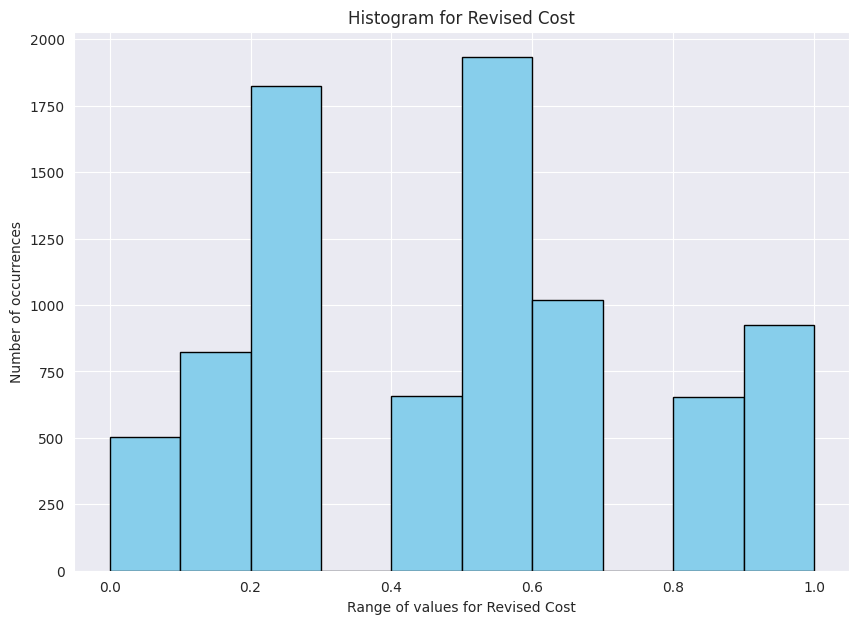

In [13]:
import matplotlib.pyplot as plt

def plot_histogram(data_array, column_index, column_name):
    try:
        data_column = data_array[:, column_index].astype(float)
    except ValueError:
        print(f"Error: Column {column_index} ({column_name}) contains non-numeric values.")
        return

    min_value = data_column.min()
    max_value = data_column.max()

    print(f'Min value: {min_value} for {column_name}')
    print(f'Max value: {max_value} for {column_name}')

    plt.figure(figsize=(10, 7))
    plt.hist(data_column, bins=10, range=(min_value, max_value), color='skyblue', edgecolor='black')
    plt.xlabel('Range of values for ' + column_name)
    plt.ylabel('Number of occurrences')
    plt.title(f'Histogram for {column_name}')
    plt.show()

column_index = 41
column_name = "Revised Cost"
plot_histogram(normalized_data, column_index, column_name)

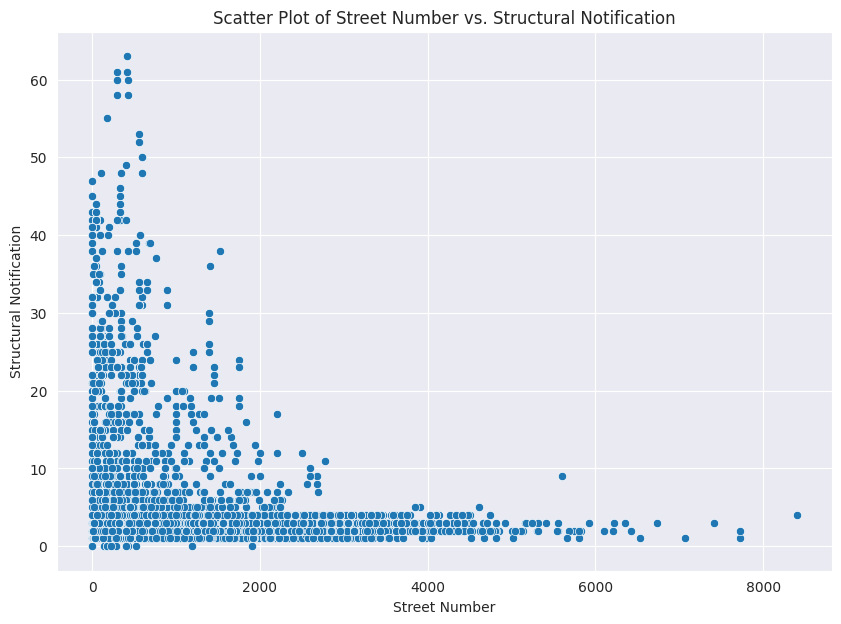

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_dependency(data_array, x_column_index, y_column_index, x_label, y_label, title):
    x_data = data_array[:, x_column_index].astype(float)
    y_data = data_array[:, y_column_index].astype(float)

    sns.set_style("darkgrid")
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=x_data, y=y_data)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

x_column_index = 6
y_column_index = 23
x_label = 'Street Number'
y_label = 'Structural Notification'
title = 'Scatter Plot of Street Number vs. Structural Notification'

plot_dependency(cleaned_data, x_column_index, y_column_index, x_label, y_label, title)

In [ ]:
def pearson_corr(data_array, col1_index, col2_index):
    pearson_corr_matrix = np.corrcoef(data_array[:, col1_index].astype(float), data_array[:, col2_index].astype(float))
    pearson_corr_value = pearson_corr_matrix[0, 1]
    return pearson_corr_value

def spearman_corr(data_array, col1_index, col2_index):
    data1_rank = np.argsort(np.argsort(data_array[:, col1_index].astype(float)))
    data2_rank = np.argsort(np.argsort(data_array[:, col2_index].astype(float)))

    d = data1_rank - data2_rank
    d_squared = d**2

    sum_d_squared = np.sum(d_squared)

    n = len(data_array[:, col1_index].astype(float))
    spearman_corr_value = 1 - (6 * sum_d_squared) / (n * (n**2 - 1))
    return spearman_corr_value

col1_index = 1
col2_index = 10

start_time = timeit.default_timer()
pearson_result = pearson_corr(cleaned_data, col1_index, col2_index)
end_time = timeit.default_timer()
print(f"Execution time for Pearson: {end_time - start_time} seconds")
print(f"Pearson's correlation coefficient: {round(pearson_result, 3)}")

start_time = timeit.default_timer()
spearman_result = spearman_corr(cleaned_data, col1_index, col2_index)
end_time = timeit.default_timer()
print(f"Execution time for Spearman: {end_time - start_time} seconds")
print(f"Spearman's correlation coefficient: {round(spearman_result, 3)}")

Execution time for Pearson: 0.025677072999997108 seconds
Pearson's correlation coefficient: 0.037
Execution time for Spearman: 0.03949986399993577 seconds
Spearman's correlation coefficient: 0.383


In [ ]:
import numpy as np
import timeit

def one_hot_encode_column(data, column_index):
    column = data[:, column_index]
    unique_values = np.unique(column)
    value_to_index = {value: index for index, value in enumerate(unique_values)}
    indexed_column = np.vectorize(value_to_index.get)(column)
    one_hot_encoded_column = np.eye(len(unique_values))[indexed_column]
    return one_hot_encoded_column

column_index = 27

start_time = timeit.default_timer()
one_hot_encoded_column = one_hot_encode_column(data_array, column_index)
end_time = timeit.default_timer()

print(f"Execution time: {end_time - start_time} seconds")
print("Shape of encoded data:", one_hot_encoded_column.shape)
print(one_hot_encoded_column[:5])

Execution time: 0.0952211729999135 seconds
Shape of encoded data: (8340, 1805)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


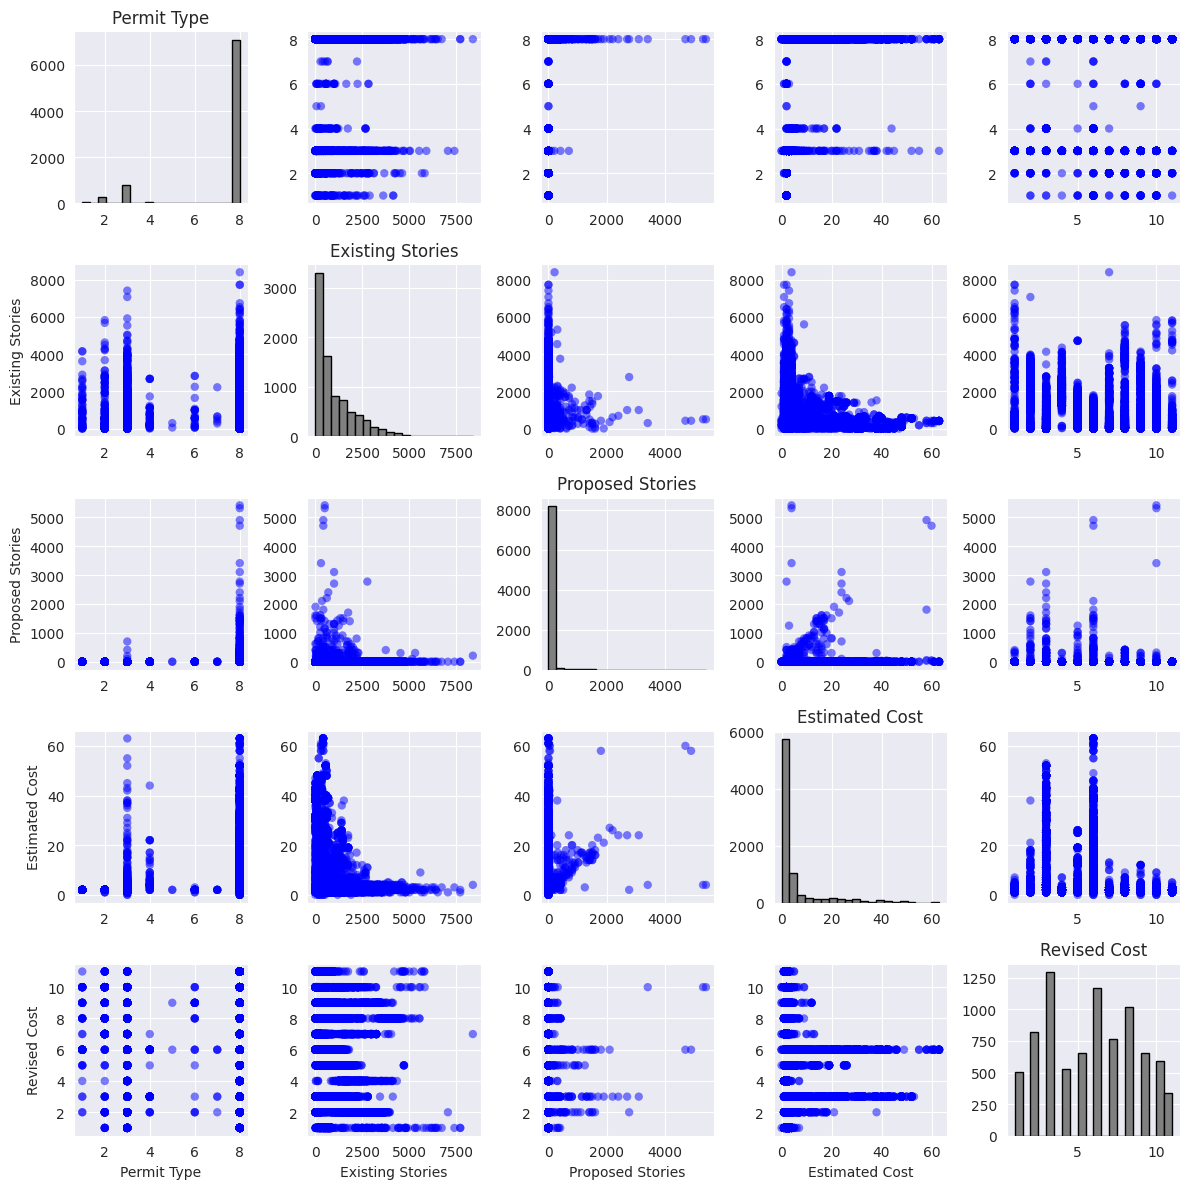

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def plot_matrix(data, labels):
    n = data.shape[1]
    fig, ax = plt.subplots(n, n, figsize=(12, 12))

    for i in range(n):
        for j in range(n):
            if i == j:
                ax[i, j].hist(data[:, i], bins=20, color='gray', edgecolor='black')
                ax[i, j].set_title(labels[i])
            else:
                ax[i, j].scatter(data[:, j], data[:, i], alpha=0.5, edgecolor='none', color='blue')
                if i == n - 1:
                    ax[i, j].set_xlabel(labels[j])
                if j == 0:
                    ax[i, j].set_ylabel(labels[i])

    plt.tight_layout()
    plt.show()

indices = [1, 6, 10, 23, 41]
data_for_plot = cleaned_data[:, indices].astype(float)  #
labels = ["Permit Type", "Existing Stories", "Proposed Stories", "Estimated Cost", "Revised Cost"]

plot_matrix(data_for_plot, labels)